In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile

import tensorflow as tf
import zipfile


from collections import defaultdict
import io
from io import StringIO

from matplotlib import pyplot as plt


import PIL
from PIL import Image

import glob

sys.path.append("..")
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util 
from object_detection.utils import visualization_utils as vis_utils

/lib/tf/models/research/object_detection/utils/visualization_utils.py:26: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tor

In [2]:
def inspect_tfrecord(TFRECORDS_PATH,
                     view_max_instances=np.inf):
    instance=0
    
    record_iterator = tf.python_io.tf_record_iterator(TFRECORDS_PATH)

    for string_record in record_iterator:
        instance+=1
        example = tf.train.Example()
        example.ParseFromString(string_record)
        
        ## Print infos:
        
        #temp
        label = example.features.feature['image/object/class/label'].bytes_list.value
        text = example.features.feature['image/object/class/text'].int64_list.value
        print(label, text)
        
        fn = example.features.feature['image/filename'].bytes_list.value
        fid= example.features.feature['image/id'].int64_list.value
        print(fn, 'id: ', fid)

        w = example.features.feature['image/width'].int64_list.value[0]
        h = example.features.feature['image/height'].int64_list.value[0]
        print('Image size: ',w,'*',h)

        bb_y0 = example.features.feature['image/object/bbox/ymin'].float_list.value
        bb_y1 = example.features.feature['image/object/bbox/ymax'].float_list.value
        bb_x0 = example.features.feature['image/object/bbox/xmin'].float_list.value
        bb_x1 = example.features.feature['image/object/bbox/xmax'].float_list.value
        
        for i in range(0,len(bb_y0)):
                print('Object BBox - Bounding box ',i,' at: {:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(bb_y0[i], bb_y1[i], bb_x0[i], bb_x1[i]))

        bb_y0_pred = example.features.feature['image/detection/bbox/ymin'].float_list.value
        bb_y1_pred = example.features.feature['image/detection/bbox/ymax'].float_list.value
        bb_x0_pred = example.features.feature['image/detection/bbox/xmin'].float_list.value
        bb_x1_pred = example.features.feature['image/detection/bbox/xmax'].float_list.value
        print('Detection - Bounding box at', bb_y0_pred, bb_y1_pred, bb_x0_pred, bb_x1_pred)

        ## Other things of interest could include:
        # label= example.features.feature['image/class/label'].int64_list.value
        # print(label)
        # fid= example.features.feature['image/class/text'].int64_list.value
        # print(fid)
        # fid= example.features.feature['image/class/conf'].int64_list.value
        # print(fid)
        # fid= example.features.feature['image/object/bbox/label'].int64_list.value
        # print(fid)
        # fid= example.features.feature['image/object/bbox/text'].int64_list.value
        # print(fid)
        # fid= example.features.feature['image/object/bbox/conf'].int64_list.value
        # print(fid)
        # fid= example.features.feature['image/object/bbox/score'].int64_list.value
        # print(fid)
        # fid= example.features.feature['image/object/parts/x'].int64_list.value
        # print(fid)
        # fid= example.features.feature['image/detection/bbox/xmin'].int64_list.value
        # print(fid)

        ## See https://github.com/microsoft/CameraTraps/blob/master/data_management/tfrecords/tools/iterate_tfrecords.py 
        ## for more attributes.

        
        encoded = example.features.feature["image/encoded"].bytes_list.value[0]
        img = PIL.Image.open(io.BytesIO(encoded))
        
        
        if bb_x0:
            vis_utils.draw_bounding_box_on_image(img,
                                ymin=bb_y0[0],xmin=bb_x0[0],ymax=bb_y1[0],xmax=bb_x1[0],
                                color='cyan',
                                thickness=4,
                                display_str_list=('dam'),
                                use_normalized_coordinates=True)
        if bb_x0_pred:
            vis_utils.draw_bounding_box_on_image(img,
                                ymin=bb_y0_pred[0],xmin=bb_x0_pred[0],ymax=bb_y1_pred[0],xmax=bb_x1_pred[0],
                                color='red',
                                thickness=4,
                                display_str_list=('predicted'),
                                use_normalized_coordinates=True)
        
        display(img)
        

        
        if instance>(view_max_instances-1):
            break

In [11]:
path_to_charlie_root = "../../.."
dataset_path = os.path.join(path_to_charlie_root,"data/TFRecords_imagery-6-7_made-6-14 /training_set/*.record")

    

[] []
[b'../../../data/imagery-6-7-2019/not_a_dam_images/1144-1362_not_a_dam_bb.png'] id:  []
Image size:  419 * 419
Detection - Bounding box at [] [] [] []


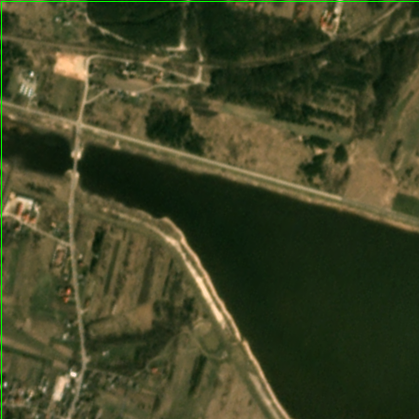

[] []
[b'../../../data/imagery-6-7-2019/dam_images/5140_clipped.png'] id:  []
Image size:  419 * 419
Object BBox - Bounding box  0  at: 0.43, 0.57, 0.40, 0.60
Detection - Bounding box at [] [] [] []


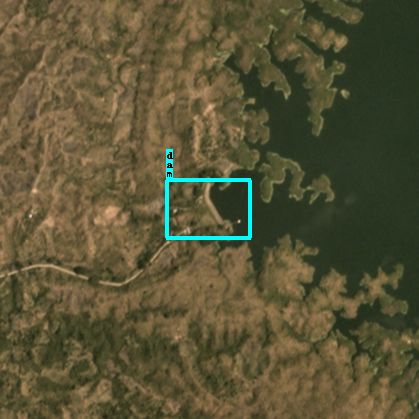

[] []
[b'../../../data/imagery-6-7-2019/not_a_dam_images/369-1362_not_a_dam_bb.png'] id:  []
Image size:  419 * 419
Detection - Bounding box at [] [] [] []


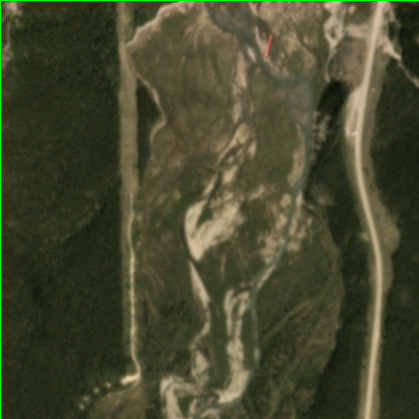

[] []
[b'../../../data/imagery-6-7-2019/not_a_dam_images/374-1362_not_a_dam_bb.png'] id:  []
Image size:  419 * 419
Detection - Bounding box at [] [] [] []


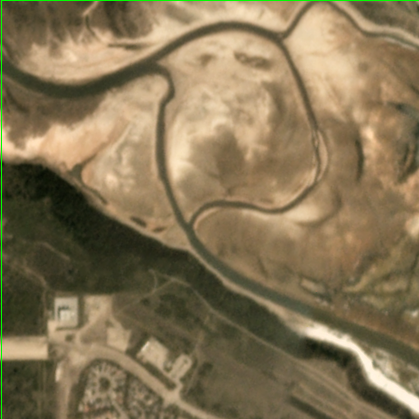

In [12]:
# Can be a .record or a list of .record
sess = tf.InteractiveSession()

# Loop on .record files in dataset folder
for i in range(0,len(list(glob.glob(dataset_path)))):
    TFRECORDS_PATH = list(glob.glob(dataset_path))[i]
    
    
    # To view just n instances of each file, set view_max_instances=n
    inspect_tfrecord(TFRECORDS_PATH,view_max_instances=10)
    
    
sess.close()

[] []
[b'../../../data/imagery-6-7-2019/not_a_dam_images/351-1362_not_a_dam_bb.png'] id:  []
Image size:  419 * 419
Detection - Bounding box at [] [] [] []


/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


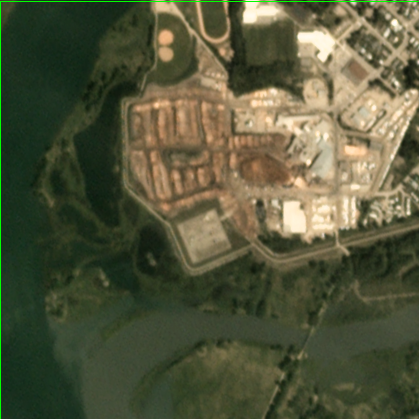

[] []
[b'../../../data/imagery-6-7-2019/dam_images/115140_clipped.png'] id:  []
Image size:  419 * 419
Object BBox - Bounding box  0  at: 0.38, 0.62, 0.47, 0.53
Detection - Bounding box at [] [] [] []


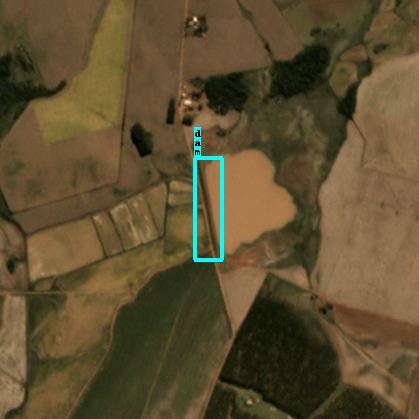

[] []
[b'../../../data/imagery-6-7-2019/not_a_dam_images/351-1362_not_a_dam_bb.png'] id:  []
Image size:  419 * 419
Detection - Bounding box at [] [] [] []


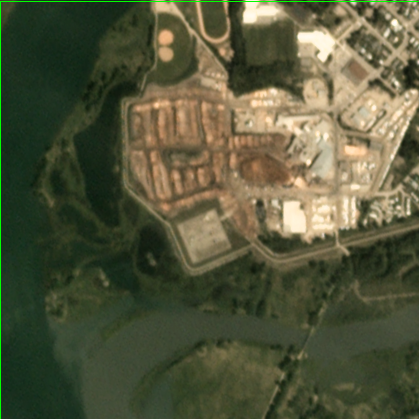

In [12]:
# Can be a .record or a list of .record
sess = tf.InteractiveSession()

# Loop on .record files in dataset folder
for i in range(0,len(list(glob.glob(dataset_path)))):
    TFRECORDS_PATH = list(glob.glob(dataset_path))[i]
    
    
    # To view just n instances of each file, set view_max_instances=n
    inspect_tfrecord(TFRECORDS_PATH,view_max_instances=10)
    
    
sess.close()